## LSA (Analiza semantica latenta) folosind descompunerea in valori singulare.

Folosind câteva titluri, realizăm un documente text pentru a ilustra elementele de bază ale LSA sub forma unui dicționar python, numit c mai jos. Astfel *c['May31']* este un document, iar *c* are încă trei documente. Fiecare document este compus din mai multe cuvinte, sau termeni. Trebuie să simplificăm complexitatea limbajului natural pentru a putea calcula ceva.

In [1]:
c = {'May31':
     'Two crises convulse a nation: a pandemic and police violence',

     'May30a':
     'Nation’s first astronaut launch to orbit from home soil in nearly a decade',

     'May30b':
     'Death of George Floyd at the hands of police set off protests',

     'May27':
     'SpaceX launch of NASA astronauts is postponed over weather'}

Mai departe vom proceda pornind de la ideea că ordinea cuvintelor, declinările și conjugările, precum și cuvintele utilizate frecvent, cum ar fi articolele și prepozițiile, sunt toate irelevante. Apoi, considerăm conceptele ca fiind simple asociații ale cuvintelor rădăcină rămase, asociații marcate de aparițiile lor comune în documente. LSA este utilă doar în condițiile în care se presupune că cuvintele apropiate din punct de vedere semantic vor apărea în documente similare, pe măsură ce numarul de documente devine mare.

Aplicarea simplificărilor lingvistice menționate mai sus, chiar și la un corpus mic, reprezintă o muncă enormă, dacă încercați să o faceți de la zero. Dar, din fericire, există mai multe module python care excelează în procesarea limbajului natural (NLP). Mai jos, voi folosi spaCy, una dintre cele mai recente adăugiri la setul de instrumente NLP python. (Vă rugăm să îl instalați și, de asemenea, asigurați-vă că ați instalat setul lor de date în limba engleză en_core_web_sm, de exemplu prin python3 -m spacy download en_core_web_sm, înainte de a continua).

In [15]:
%pip install pandas matplotlib numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import spacy
from spacy import displacy

# Install dataset: python3 -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

Modulul spacy este capabil să proceseze propoziții și să identifice substantive, verbe, obiecte directe și interrelațiile dintre acestea. În celula de mai jos, după procesarea unei propoziții, rezultatul este salvat într-o figură SVG. Imaginea salvată este apoi afișată ca imagine în celula următoare.

In [8]:
doc0 = nlp('Two crises convulse a nation')
svg = displacy.render(doc0, style="dep", jupyter=True)



In [9]:
doc1 = nlp('SpaceX launch of NASA astronauts is postponed over weather')
displacy.render(doc1, style='ent', jupyter=True, options={'distance':90})

Vom folosi capacitățile pachetului pentru tokenizare și lematizare. Tokenizarea este procesul de împărțire a unei propoziții sau a unui document în cuvinte prin intermediul caracterelor de demarcație, cum ar fi spațiile albe. Lematizarea este procesul de identificare a așa-numitei "lemme" a unui cuvânt, care ne permite să grupăm formele flexionate ale cuvântului într-un singur element. Iată rezultatul tokenizării și lematizării pe propoziția de mai sus. Observați cum cuvintele "astronauts" și "postponed", găsite inițial, s-au schimbat în rezultat.

In [10]:
[w.lemma_ for w in doc1 if not w.is_stop]

['SpaceX', 'launch', 'NASA', 'astronaut', 'postpone', 'weather']

De asemenea, am eliminat cuvintele de oprire, o colecție a celor mai frecvente cuvinte dintr-o limbă, identificate și clasificate anterior de programul NLP. În exemplul de mai sus, au fost eliminate cuvintele "of", "is" și "over".

### Matricea termen-document
Obiectul matematic important pentru LSA este matricea termen-document, o matrice ale cărei rânduri corespund termenilor, ale cărei coloane corespund documentelor și al cărei element în poziția (t,d)
  este 1 dacă documentul din coloana d
  conține termenul din rândul t
 și este 0 în caz contrar. Să realizăm această matrice cu un hack rapid (în care am cerut acum și lui spacy să ignore punctuațiile). Matricea va fi afișată ca un cadru de date pandas pentru a vizualiza cu ușurință etichetele termenilor și documentelor din rânduri și coloane.


In [13]:
import pandas as pd
from scipy.sparse import lil_matrix # lil_matrix -creaza o matrice rara ce se poate incrementa

d = {}
for j, dok in enumerate(c.keys()):
    tokens = [w.lemma_ for w in nlp(c[dok])
              if not w.is_stop and w.pos_ != 'PUNCT']
    for t in tokens:
        d[t] = d.setdefault(t, [])
        d[t] += [j]
A = lil_matrix((len(d.keys()), len(c.keys())), dtype=int)
for i, t in enumerate(d.keys()):
    for j in d[t]:
        A[i, j] = 1
Adf = pd.DataFrame(A.toarray(), index=d.keys(), columns=c.keys());
Adf

,May31,May30a,May30b,May27
crisis,1,0,0,0
convulse,1,0,0,0
nation,1,0,0,0
pandemic,1,0,0,0
police,1,0,1,0
violence,1,0,0,0
Nation,0,1,0,0
astronaut,0,1,0,1
launch,0,1,0,1
orbit,0,1,0,0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set();
from numpy.linalg import norm
from scipy.linalg import svd

Descompuneti matricea A in u, s, vt folosind functia **svd.** Folositi functia .toarray pentru a transforma A in obiect ndarray.



In [18]:
u, s, vt = svd(A.toarray(), full_matrices=False)

 Utilizând cel mai bun rang k
  aproximație, primele k
  vectori singulari drepți sunt utilizați pentru a reprezenta fiecare document ca un
  vector k.

In [22]:
k = 4                                   # Limit to rank k
Vt = vt[:k, :]
pd.DataFrame(Vt, columns=c.keys())      # Documents as k-vectors

,May31,May30a,May30b,May27
0,0.000000,0.850651,0.000000,0.525731
1,-0.525731,0.000000,-0.850651,-0.000000
2,0.850651,0.000000,-0.525731,-0.000000
3,-0.000000,0.525731,0.000000,-0.850651


Al doilea pas important este reprezentarea cuvintelor (sau a termenilor) ca obiecte matematice în același spațiu. Spre deosebire de documente, cuvintele/termenii sunt reprezentați de primele k
  vectori singulari din stânga, ponderați cu valorile singulare asociate. Primele cinci semne de cuvânt sunt afișate mai jos sub formă de vectori.

In [23]:
US = u[:, :k] @ np.diag(s[:k])
usp = pd.DataFrame(US, index=d.keys()) # Words as k-vectors
usp.head()

,0,1,2,3
crisis,4.079834e-17,-0.525731,0.850651,-6.601309e-17
convulse,-8.669708e-17,-0.525731,0.850651,1.402788e-16
nation,1.102658e-17,-0.525731,0.850651,-1.784137e-17
pandemic,1.179267e-17,-0.525731,0.850651,-1.908094e-17
police,1.116296e-17,-1.376382,0.324920,-1.806205e-17


Multe cuvinte sunt puse în corespondență cu același punct într-un exemplu atât de mic. Cu alte cuvinte, nu există suficiente date în micul nostru exemplu pentru a face distincția între astfel de cuvinte.

Cu toate acestea, chiar și în setul nostru de date foarte mic, este foarte interesant să vedem asocierile dintre cuvinte în ceea ce privește cât de diferiți sunt vectorii de cuvinte. Ignorând magnitudinea vectorilor de cuvinte, se poate măsura diferența dintre doi vectori de cuvinte (ambii extrași de la origine) folosind un dispozitiv diferit de normă. Atunci când se ignoră magnitudinea, diferența dintre vectori este captată prin unghiul pe care vectorii de cuvinte îl fac unul cu celălalt sau prin cosinusul unghiului. Doi vectori de aceeași mărime sunt mai îndepărtați dacă cosinusul unghiului lor este mai mic. Amintiți-vă că este foarte ușor de calculat cosinusul unghiului dintre doi vectori unitari, deoarece acesta este egal cu produsul lor în puncte

In [26]:
# crearea vectorilor asociati celor trei termeni astronaut, crisis si police
astronaut = usp.loc['astronaut', :].to_numpy()
crisis    = usp.loc['crisis', :].to_numpy()
police    = usp.loc['police', :].to_numpy()

print('cosinusul unghiului intre vectorul police si crisis',crisis.dot(police) / norm(police) / norm(crisis))
print('cosinusul unghiului intre vectorul astronaut si crisis',crisis.dot(astronaut) / norm(astronaut) / norm(crisis))

cosinusul unghiului intre vectorul police si crisis 0.7071067811865478
cosinusul unghiului intre vectorul astronaut si crisis 5.487364018953039e-17


Haideți să aprofundăm puțin acest aspect. În micul nostru exemplu, deoarece cuvintele sunt vectori bidimensionali, le putem reprezenta grafic pentru a vedea cum sunt dispersate în funcție de unghiurile măsurate de la origine. Mai jos, originea este marcată ca o stea roșie, iar punctele care reprezintă punctul terminal al vectorilor de cuvinte sunt notate cu cuvântul.

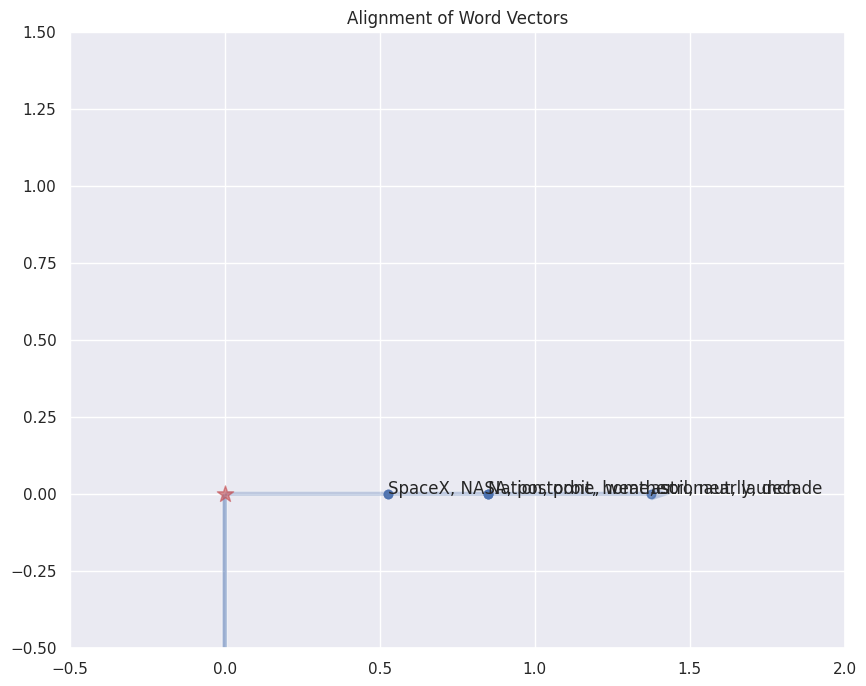

In [27]:
w = {}; us = np.round(US, 8) # w[(x,y)] = list of words at that point
usr = list(set([tuple(us[i, :]) for i in range(us.shape[0])]))
for i in range(len(usr)):
    w[usr[i]] = []
    for j in range(usp.shape[0]):
        if norm(usp.iloc[j, :] - usr[i]) < 1e-6:
            w[usr[i]] += [usp.index[j]]
fig = plt.figure(figsize=(10, 8)); ax = fig.gca()
ax.arrow(0, 0, crisis[0], crisis[1],       width=0.015, alpha=0.3)
ax.arrow(0, 0, police[0], police[1],       width=0.015, alpha=0.3)
ax.arrow(0, 0, astronaut[0], astronaut[1], width=0.015, alpha=0.3)
ax.scatter(US[: , 0], US[: ,1], alpha=0.5)
ax.scatter(0, 0,  color='r', marker='*', s=150, alpha=0.6);
for i, key in enumerate(w.keys()):
    ax.annotate(', '.join(w[key]), (key[0], key[1]))
ax.set_xlim((-0.5, 2)); ax.set_ylim((-0.5, 1.5));
ax.set_title('Alignment of Word Vectors');